# MSDS 7331 - Project 1 - Visualization
## Team: Dineen Parker, Dale Legband, Ryan Shuhart

In [61]:
### Modules Used ###

# Pandas Module for data manipulation
import pandas as pd

# pandas_profiling is a handy tool for inspecting data
# https://github.com/JosPolfliet/pandas-profiling
# pip install pandas-profiling
import pandas_profiling

# seaborn and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Page settings - might not need...
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Business Understanding (10 points total).
* Describe the purpose of the data set you selected (i.e., why was this data collected in
the first place?). 
* Describe how you would define and measure the outcomes from the
dataset. That is, why is this data important and how do you know if you have mined
useful knowledge from the dataset? 
* How would you measure the effectiveness of a
good prediction algorithm? Be specific.

From CRISP-DM article (https://mineracaodedados.files.wordpress.com/2012/04/the-crisp-dm-model-the-new-blueprint-for-data-mining-shearer-colin.pdf):
* What are the measures of success?
* Are there any assumptions?
* Create a glossary, if needed

# Data Understanding (80 points total)

* [15 points] Verify data quality: Explain any missing values, duplicate data, and outliers.
Are those mistakes? How do you deal with these problems? Give justifications for your
methods.

* [10 points] Visualize appropriate statistics (e.g., range, mode, mean, median, variance,
counts) for a subset of attributes. Describe anything meaningful you found from this or if
you found something potentially interesting. Note: You can also use data from other
sources for comparison. Explain why the statistics run are meaningful.

* [15 points] Visualize the most interesting attributes (at least 5 attributes, your opinion
on what is interesting). Important: Interpret the implications for each
visualization. Explain for each attribute why the chosen visualization is appropriate.

* [15 points] Visualize relationships between attributes: Look at the attributes via scatter
plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain
any interesting relationships.

* [10 points] Identify and explain interesting relationships between features and the class
you are trying to predict (i.e., relationships with variables and the target classification).

* [5 points] Are there other features that could be added to the data or created from
existing features? Which ones?

### Collect Initial Data

In [ ]:
# Data comes from the UCI Machine Learning Repository
# http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
# load the data into memory source. First row are for reference with headings starting on line 2.
# ID field is use as the index field in the data frame
cc_data = pd.read_excel("./cc_data/default of credit card clients.xls", skiprows=1, index_col='ID')

# Convert numerical representations to category names
cc_data.loc[(cc_data['SEX']==1), 'SEX'] = 'Male'
cc_data.loc[(cc_data['SEX']==2), 'SEX'] = 'Female'

cc_data.loc[(cc_data['EDUCATION']==1), 'EDUCATION'] = 'graduate school'
cc_data.loc[(cc_data['EDUCATION']==2), 'EDUCATION'] = 'university'
cc_data.loc[(cc_data['EDUCATION']==3), 'EDUCATION'] = 'high school'
cc_data.loc[(cc_data['EDUCATION']==4), 'EDUCATION'] = 'others'

cc_data.loc[(cc_data['MARRIAGE']==1), 'MARRIAGE'] = 'Married'
cc_data.loc[(cc_data['MARRIAGE']==2), 'MARRIAGE'] = 'Single'
cc_data.loc[(cc_data['MARRIAGE']==3), 'MARRIAGE'] = 'Others'
cc_data.loc[(cc_data['MARRIAGE']==0), 'MARRIAGE'] = 'Others' # What is the 0? Imputing to 'Others'

### Describe the data

In [64]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null object
EDUCATION                     30000 non-null object
MARRIAGE                      30000 non-null object
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1             

* [10 points] Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file.

#### Summary Statistics
- Distribution of Defaults (facet plot)
 - by age
 - by sex
 - by education
 - by marriage
- Distribution of age
- Distribution of sex
- Distribution of education<br><br>
- CC History frequency tables
 - by age
 - by sex
 - by education
 - by marriage

In [67]:
cc_data.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
Married    13659
Others       377
Single     15964
Name: MARRIAGE, dtype: int64

### Explore the data

In [32]:
#profile = pandas_profiling.ProfileReport(cc_data)
#profile.to_file(outputfile="./myoutputfile.html")

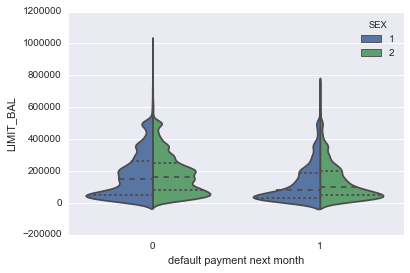

In [55]:
sns.violinplot(data=cc_data, x='default payment next month',y='LIMIT_BAL', hue='SEX', split=True, inner="quart")

### Verify the data quality

# Exceptional Work (10 points total)
* You have free reign to provide additional analyses.
*One idea: implement dimensionality reduction, then visualize and interpret the results.

feature creation ideas:
* Age brackets
* Ratio of Pay Amount to Bill Amount
* Ratio of Bill Amount to LIMIT_BAL
* Transformation of data - scaling

Sources:
https://www.wakari.io/sharing/bundle/ijstokes/pyvis-1h?has_login=False